In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
colors = [
    "#F27970",
    "#BB9727",
    "#54B345",
    "#05B9E2",
    "#8983BF",
    "#C76DA2",
    "#934B43",
    "#F1D77E",
    "#5F97D2",
    "#A5B6C5",
    "#32B897",
    "#54a0ff",
    "#5f27cd"
]

<Figure size 600x400 with 0 Axes>

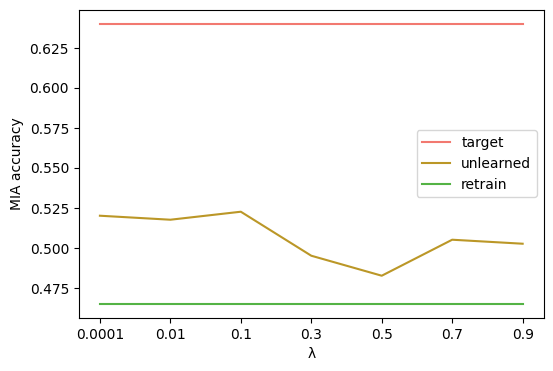

In [3]:
iid_mnist_path = "/home/zhangdongping/project/normal_fed/fu_subset/result/MNIST/third_rest_10_5_128_16_16_200_0_0.1_0.01_0.5_paper"
lambdas = ["0.0001", "0.01", "0.1", "0.3", "0.5", "0.7", "0.9"]
labels = ["target", "unlearned", "retrain"]
plt.figure(figsize=(6, 4))
result = [[], [], []]
for lam in lambdas:
    ul_df = pd.read_csv(iid_mnist_path+f"/0/unlearn_{float(lam)}_results.csv")
    re_df = pd.read_csv(iid_mnist_path+"/mia_result.csv")
    result[0].append(ul_df.loc[ul_df["name"]=="accBefore_MIA", :]['result'].tolist()[0])
    result[1].append(ul_df.loc[ul_df["name"]=="accAfter_MIA", :]['result'].tolist()[0])
    result[2].append(re_df.loc[re_df["type"]=="retrain", :]['value'].tolist()[0])

df = pd.DataFrame(data={
    "target": result[0],
    "unlearned": result[1],
    "retrain": result[2]
})
df.to_csv("./mnist_mia.csv", index=True, float_format="%.4f")

plt.figure(figsize=(6, 4))
for i in range(3):
    plt.plot(lambdas, result[i], c=colors[i], label=labels[i])

plt.xticks(lambdas)
plt.legend()
plt.xlabel("λ")
plt.ylabel("MIA accuracy")
plt.savefig("iid_mnist_mia.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 600x400 with 0 Axes>

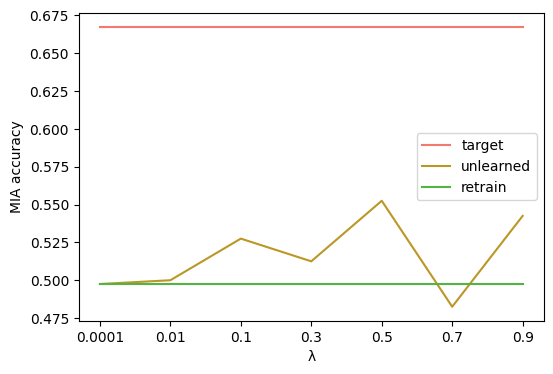

In [4]:
non_iid_mnist_path = "/home/zhangdongping/project/normal_fed/fu_subset/result/MNISTNONIID/third_rest_25_5_128_16_16_200_0_0.1_0.01_0.5_paper"
lambdas = ["0.0001", "0.01", "0.1", "0.3", "0.5", "0.7", "0.9"]
labels = ["target", "unlearned", "retrain"]
plt.figure(figsize=(6, 4))
result = [[], [], []]
for lam in lambdas:
    ul_df = pd.read_csv(non_iid_mnist_path+f"/0/unlearn_{float(lam)}_results.csv")
    re_df = pd.read_csv(non_iid_mnist_path+"/mia_result.csv")
    result[0].append(ul_df.loc[ul_df["name"]=="accBefore_MIA", :]['result'].tolist()[0])
    result[1].append(ul_df.loc[ul_df["name"]=="accAfter_MIA", :]['result'].tolist()[0])
    result[2].append(re_df.loc[re_df["type"]=="retrain", :]['value'].tolist()[0])

df = pd.DataFrame(data={
    "target": result[0],
    "unlearned": result[1],
    "retrain": result[2]
})
df.to_csv("./noniidmnist_mia.csv", index=True, float_format="%.4f")

plt.figure(figsize=(6, 4))
for i in range(3):
    plt.plot(lambdas, result[i], c=colors[i], label=labels[i])

plt.xticks(lambdas)
plt.legend()
plt.xlabel("λ")
plt.ylabel("MIA accuracy")
plt.savefig("non_iid_mnist_mia.pdf", format="pdf", dpi=300, bbox_inches='tight')
plt.show()